# In this project we are going to perform Natural Language Processing. We are going to use CountVectorizer( Bag Of Words) Technique to predict Positive and Negative reviews.

#### Let us import the file and perform the EDA.

In [19]:
import pandas as pd
import seaborn as sns 
amazon = pd.read_csv(r"E:\DATA scientist\R\Amazon\amazonreviews.tsv", sep = "\t")

In [20]:
amazon.head(20)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
5,pos,an absolute masterpiece: I am quite sure any o...
6,neg,"Buyer beware: This is a self-published book, a..."
7,pos,Glorious story: I loved Whisper of the wicked ...
8,pos,A FIVE STAR BOOK: I just finished reading Whis...
9,pos,Whispers of the Wicked Saints: This was a easy...


In [21]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [22]:
amazon.isnull().sum()

label     0
review    0
dtype: int64

In [23]:
amazon.label.replace({"pos" : 1, "neg": 0 }, inplace = True)

#### we will convert all the messages into lower case, because the same word with different case will be treated as different words. 

In [24]:
amazon.review = amazon.review.str.lower()

In [25]:
amazon["Length"] = amazon.review.apply(len)

In [26]:
amazon.head()

,label,review,Length
0,1,stuning even for the non-gamer: this sound tra...,426
1,1,the best soundtrack ever to anything.: i'm rea...,509
2,1,amazing!: this soundtrack is my favorite music...,760
3,1,excellent soundtrack: i truly like this soundt...,743
4,1,"remember, pull your jaw off the floor after he...",481


In [27]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIKIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords

In [29]:
len(stopwords.words("english"))

179

In [30]:
import string

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def text_process(mess):            
    """                                                       
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


#### Above is the user defined function which will remove the punctuations and stopwords from the data. We will apply this function and get our data cleaned. 

In [33]:
amazon["review"].apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

#### What is the maximum and minimum lengths of the message?  and which are those message?

In [34]:
amazon["Length"].max()

1015

In [35]:
amazon[amazon["Length"] == amazon["Length"].max()]["review"].iloc[0]

"dry and humorless: i totally disagree with the reviewer from hongkong who must have been writing about some other book when she portrayed infatuation as funny and sexy, with witty dialogues and hot passion. as it happens, most of the book is devoted to a character analysis of judith. in a nut shell, judith knows that she is an ugly duckling with incredible brain power. we don't see any real attraction developing between luke and judith until the last quarter of the book. and then when it does, the author's analysis of judith is vindicated for she is accepted by luke because of her brainy self rather than her looks. the most tragicomedical line of the book must be when luke agrees with judith that she is not beautiful. disappointingly for me, just when i'm getting interested in the story in the last quarter of the book, the plot reaches its climax and comes to an end. the story is dry and tends to drag on. i must say that the writing is good as can be expected from charlotte lamb. i ga

In [36]:
amazon["Length"].min()

101

In [37]:
amazon[amazon["Length"] == amazon["Length"].min()]["review"].iloc[0]

'dont know!: the program looks fun but the software i recieved was corupt it wont load on any machine.'

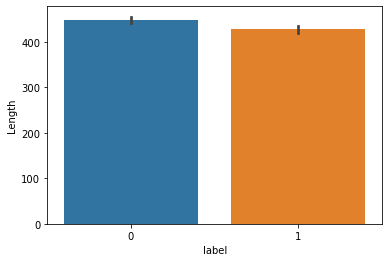

In [39]:
sns.barplot(x = "label", y = "Length", data = amazon)

#### The above bar plot gives us the idea of distribution of Positive and Negative reviews. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B46D40CE50>,
      dtype=object)

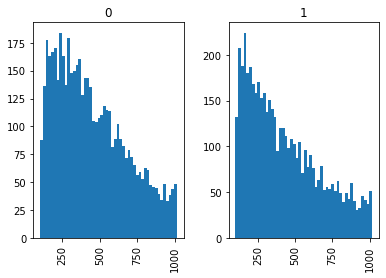

In [46]:
amazon.hist(column= "Length",by="label", bins = 50)

#### Here with the help of bar plots we can see that the length of Positive and Negative messages is almost equally concentrated. 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv = CountVectorizer()

In [49]:
bow_transform = CountVectorizer(analyzer= text_process).fit(amazon.review)

In [50]:
len(bow_transform.vocabulary_)

40040

#### As we can see, there are 40040 unique words. We will transform our data into sparse matrics.

In [51]:
review_bow = bow_transform.transform(amazon.review)

In [52]:
review_bow.shape

(10000, 40040)

#### There are 10000 records & 40040 columns. Now we are ready to split the data and apply Naive Bayes algorithm on it.

In [53]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(review_bow,amazon.label, test_size = 0.2, random_state = 101)

In [56]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [57]:
NB.fit(x_train,y_train)

MultinomialNB()

In [59]:
pred = NB.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred,y_test)
tab

array([[907, 197],
       [127, 769]], dtype=int64)

In [67]:
accuracy = tab.diagonal().sum() * 100 / tab.sum()
accuracy

83.8

## Our model has accuracy of 83.8 % . 